## PPOL 565 Programming Lab 1 

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
## PART 1
# Import data from FTC website
host = 'https://www.ftc.gov/system/files/attachments/do-not-call-dnc-reported-calls-data/dnc_complaint_numbers_2019-'
dates = ['02-04', '02-05', '02-06', '02-07', '02-08']
data = [pd.read_csv(host + date + '.csv', dtype='object') for date in dates]
data

[      Company_Phone_Number         Created_Date       Violation_Date  \
 0               5183207543  2019-02-01 00:00:02  2019-01-31 12:54:00   
 1               3158883020  2019-02-01 00:00:02  2019-01-28 15:24:00   
 2               9282125501  2019-02-01 00:00:10  2019-01-31 16:56:00   
 3               8312449952  2019-02-01 00:00:12  2019-01-31 19:22:00   
 4               9202558159  2019-02-01 00:00:35  2019-01-11 13:30:00   
 5               4192163398  2019-02-01 00:00:38  2019-01-31 09:21:00   
 6               8159575818  2019-02-01 00:01:21  2019-01-28 10:28:00   
 7               7603346258  2019-02-01 00:01:26  2019-01-30 17:57:00   
 8               8002865427  2019-02-01 00:01:33  2019-01-31 18:52:00   
 9               4199600245  2019-02-01 00:01:36  2019-01-30 12:44:00   
 10              8443868965  2019-02-01 00:01:40  2019-01-31 12:53:00   
 11              9202558159  2019-02-01 00:01:42  2019-01-12 09:36:00   
 12              2092992719  2019-02-01 00:01:55  2

In [49]:
# Combine individual dates into one dataframe
dnc = pd.concat(data)
print('Observations: ' + str(len(dnc)))
dnc.describe()

Observations: 120876


,Company_Phone_Number,Created_Date,Violation_Date,Consumer_City,Consumer_State,Consumer_Area_Code,Subject,Recorded_Message_Or_Robocall
count,117664,120876,120876,76013,120724,120875,120876,119514
unique,74474,96561,22544,10198,55,312,15,2
top,6782611817,2019-02-01 16:02:23,2019-02-04 00:00:00,Houston,California,410,No Subject Provided,Y
freq,369,6,582,517,11426,1360,46796,84390


In [57]:
#dnc.head()

In [51]:
## PART 2
# Assess missing values
dnc.isnull().sum()

Company_Phone_Number             3212
Created_Date                        0
Violation_Date                      0
Consumer_City                   44863
Consumer_State                    152
Consumer_Area_Code                  1
Subject                             0
Recorded_Message_Or_Robocall     1362
dtype: int64

In [52]:
## PART 3
# Merge DNC data with area code information
ac = pd.read_csv('data/area_codes_raw.csv', dtype='object')
ac = ac[['Area Code', 'Description']]
dnc = pd.merge(dnc, ac, how='left', left_on='Consumer_Area_Code', right_on='Area Code')
dnc.describe()

,Company_Phone_Number,Created_Date,Violation_Date,Consumer_City,Consumer_State,Consumer_Area_Code,Subject,Recorded_Message_Or_Robocall,Area Code,Description
count,117664,120876,120876,76013,120724,120875,120876,119514,120860,120860
unique,74474,96561,22544,10198,55,312,15,2,307,303
top,6782611817,2019-02-01 16:02:23,2019-02-04 00:00:00,Houston,California,410,No Subject Provided,Y,410,"E Maryland: Baltimore, Annapolis, Chesapeake B..."
freq,369,6,582,517,11426,1360,46796,84390,1360,1360


In [54]:
#dnc.head(10)

In [55]:
# Drop missing values
dnc = dnc.drop(['Consumer_City', 'Area Code'], axis=1)
dnc = dnc.dropna()
dnc.isnull().sum()

Company_Phone_Number            0
Created_Date                    0
Violation_Date                  0
Consumer_State                  0
Consumer_Area_Code              0
Subject                         0
Recorded_Message_Or_Robocall    0
Description                     0
dtype: int64

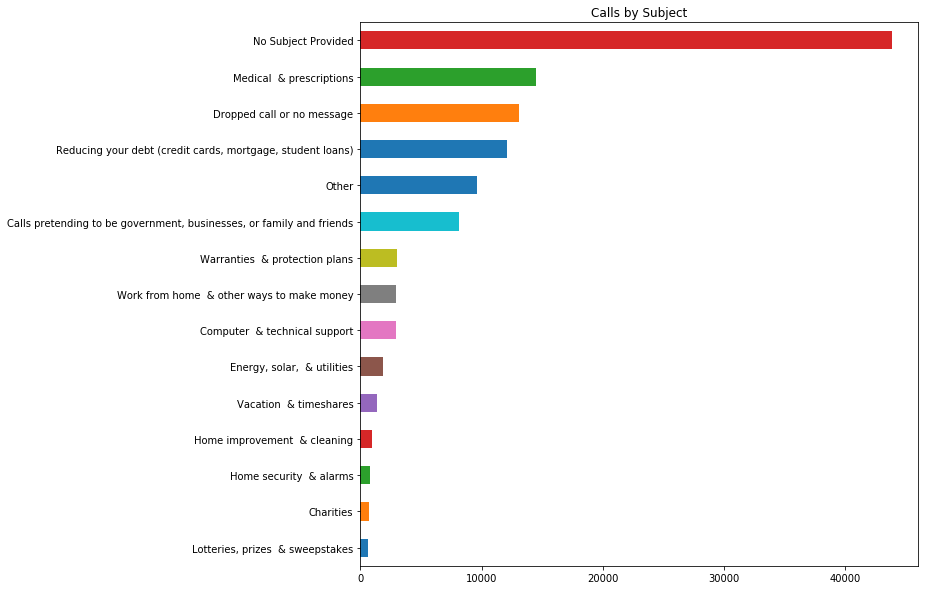

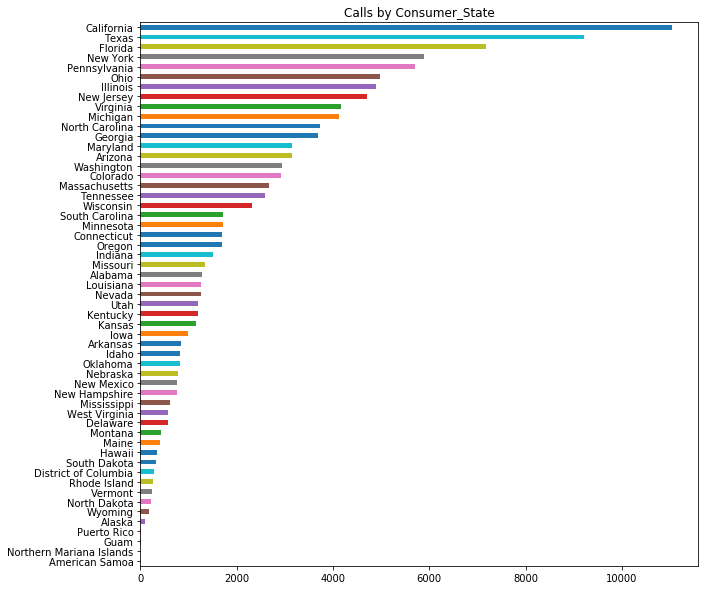

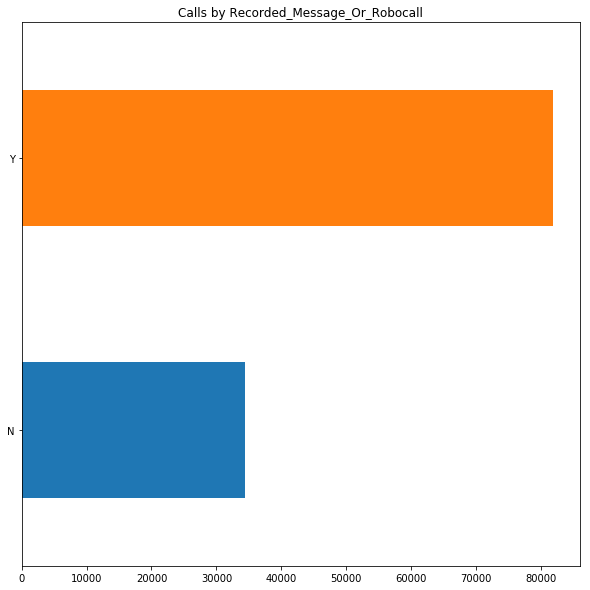

In [56]:
## PART 4
# Visualize calls by categories
variables = ['Subject', 'Consumer_State', 'Recorded_Message_Or_Robocall']
for var in variables:
    dnc[var].value_counts().sort_values().plot(kind='barh', title='Calls by ' + var, figsize=(10,10))
    plt.show()

In [32]:
## PART 5
# Summarize the number of complaints by phone number
numbers = dnc.groupby('Company_Phone_Number').size().reset_index(name='Complaints')
numbers = numbers.sort_values(by='Complaints', ascending=False)
numbers.head(10)

,Company_Phone_Number,Complaints
43101,6782611817,369
43115,6782612703,322
54610,8008472911,305
60337,8443868965,252
43119,6782612714,243
43107,6782612081,235
55786,8042814531,214
24986,4344714115,200
55774,8042813963,196
55798,8042814586,183


In [33]:
# Summarize Complaints
numbers.Complaints.describe()

count    73683.000000
mean         1.578682
std          4.492810
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        369.000000
Name: Complaints, dtype: float64

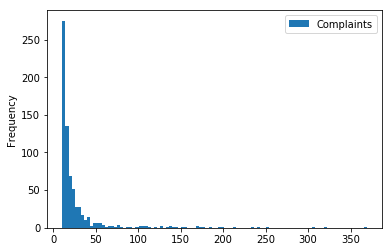

In [34]:
# Visualize the distribution of Total_Calls greater than 10
numbers[numbers['Complaints'] > 10].plot.hist(bins=100)

In [35]:
# Proportion of phone numbers made more than 10 calls?
len(numbers[numbers['Complaints'] > 10])/len(numbers)

0.00951372772552692

In [38]:
## BONUS
# Extract area information to new column and save result
ac = pd.read_csv('data/area_codes_raw.csv', dtype='object')
ac['Area'] = ac.Description.str.extract(r'.*: (.*) \(.*\)')
ac.to_csv('data/area_codes_clean.csv', index=False)
ac.head()

,Area Code,Region,Description,Area
0,52 55,MX,Mexico: Mexico City area (country code + city ...,Mexico City area
1,201,NJ,"N New Jersey: Jersey City, Hackensack (see spl...","Jersey City, Hackensack"
2,202,DC,"Washington, D.C.",NaN
3,203,CT,Connecticut: Fairfield County and New Haven Co...,Fairfield County and New Haven County; Bridgep...
4,204,MB,Canada: Manitoba (see overlay 431),Manitoba
